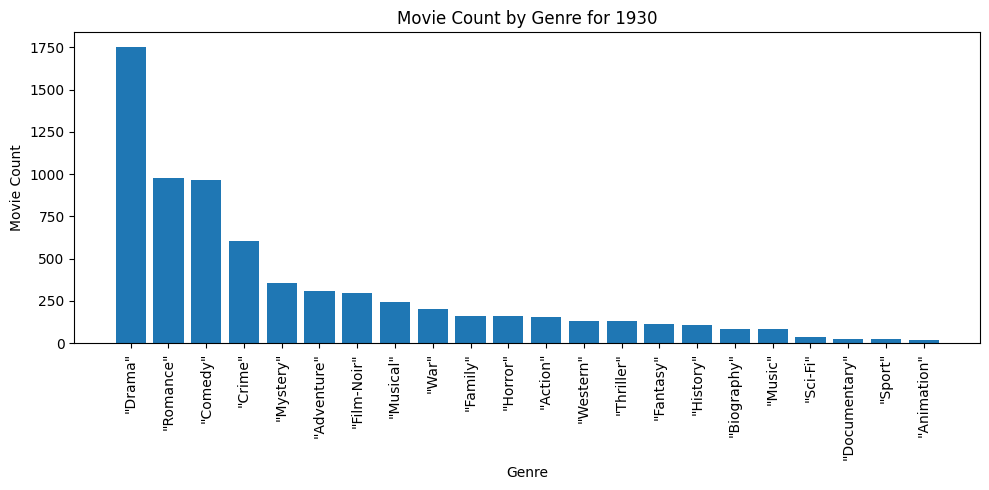

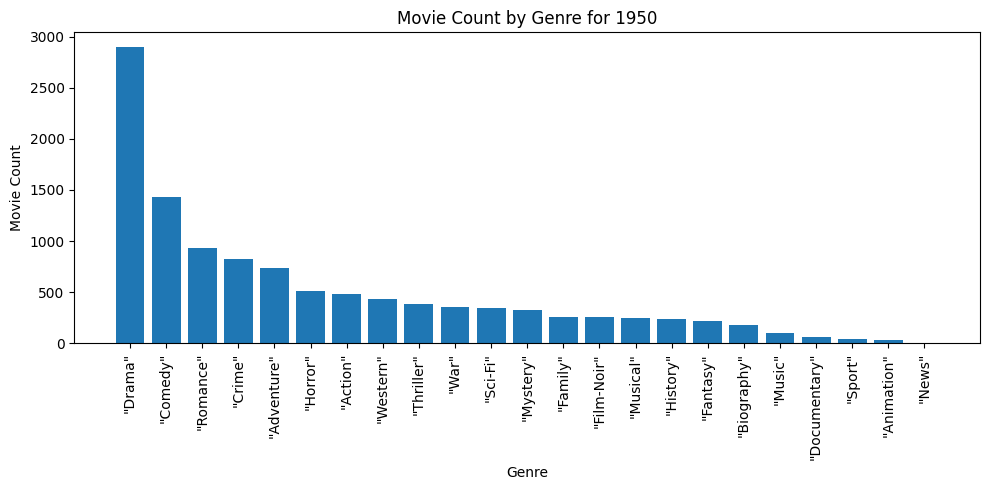

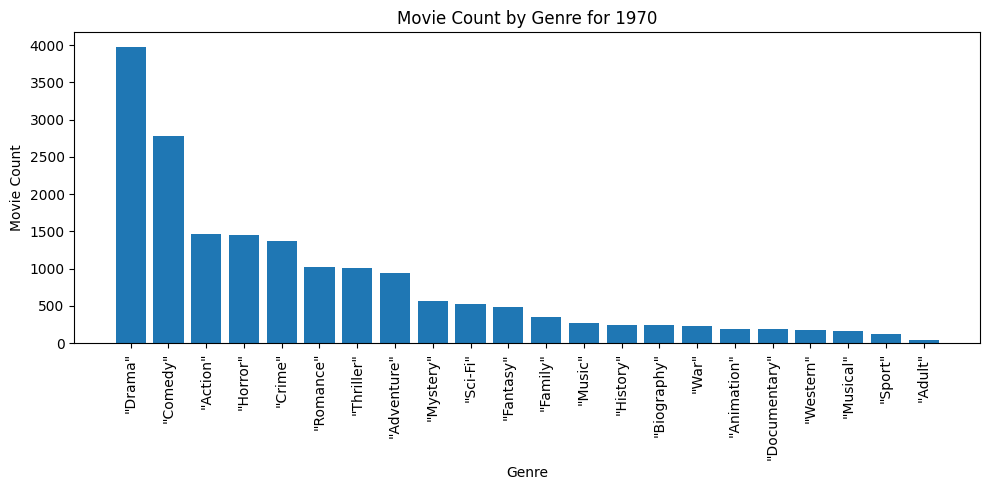

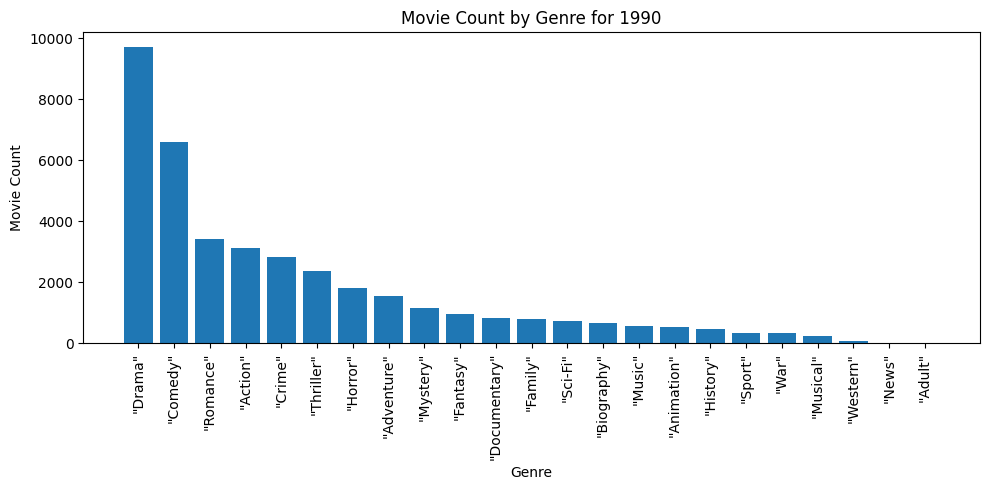

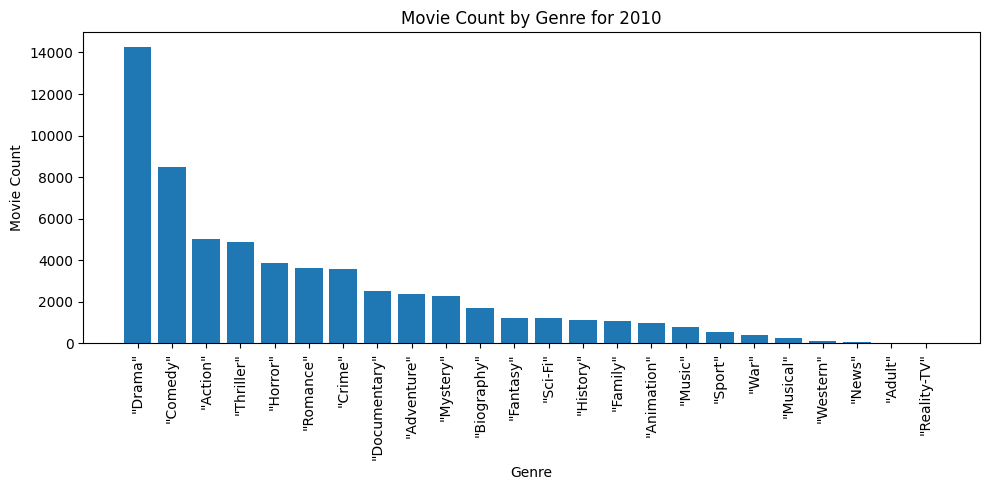

In [22]:

            query = """
            MATCH (m:Movie)-[:IS_A]->(g:Genre)
            WHERE m.year IS NOT NULL
            WITH g.name AS genre, (toInteger(m.year) - 1930) / 20 AS bucket_interval, COUNT(m) AS count
            WITH 1930 + bucket_interval * 20 AS bucket, genre, count
            ORDER BY bucket, count DESC
            WITH bucket, COLLECT({genre: genre, count: count}) AS genres
            UNWIND genres AS genre_info
            RETURN bucket AS BucketYear, genre_info.genre AS Genre, genre_info.count AS MovieCount
            ORDER BY BucketYear, MovieCount DESC
            """

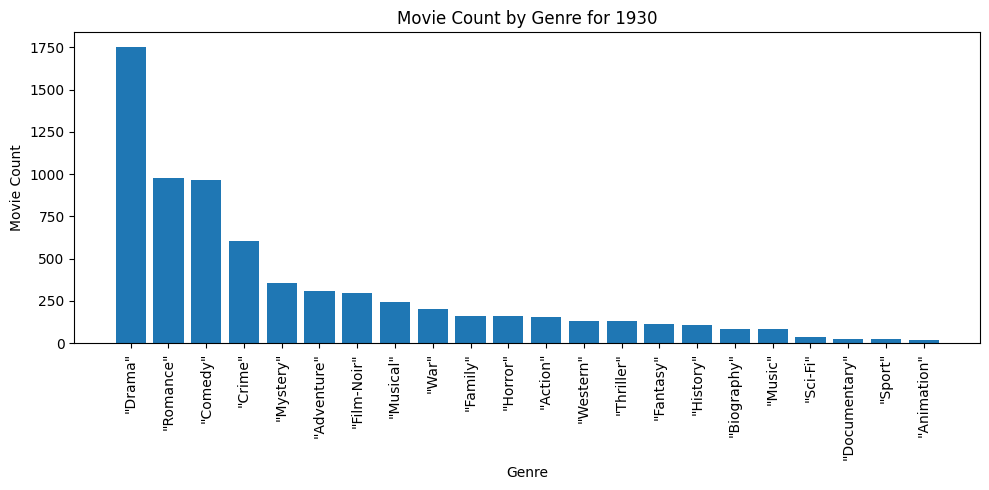

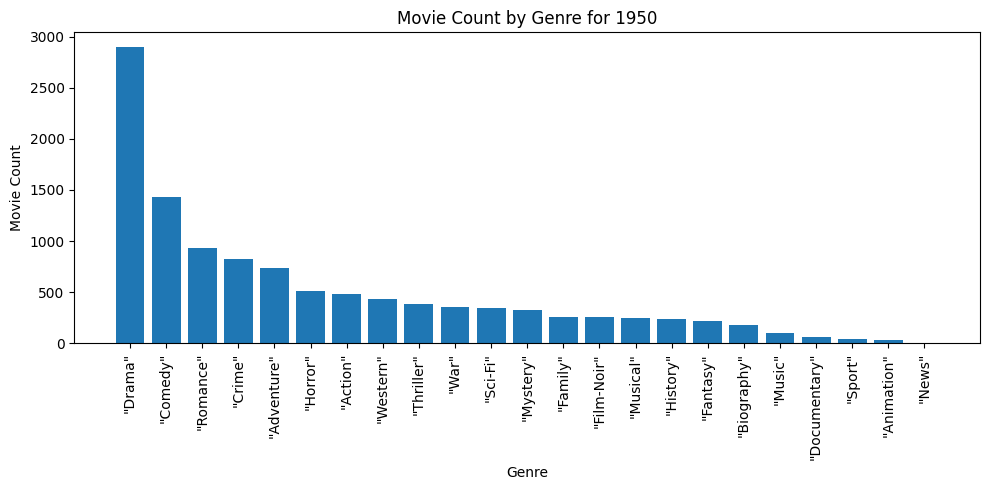

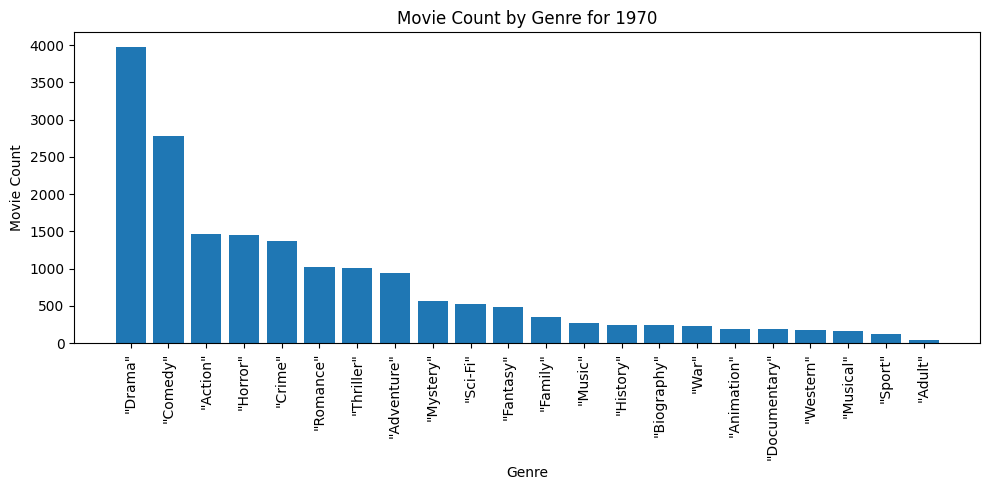

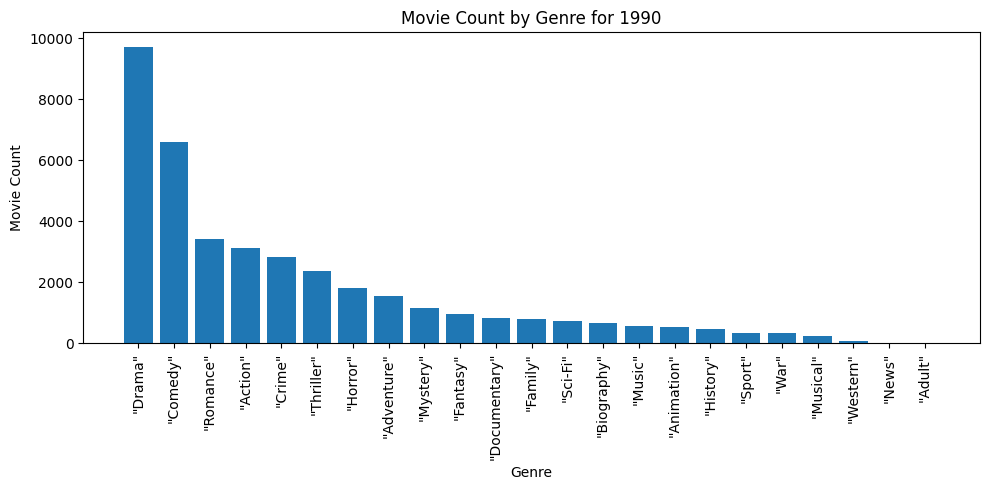

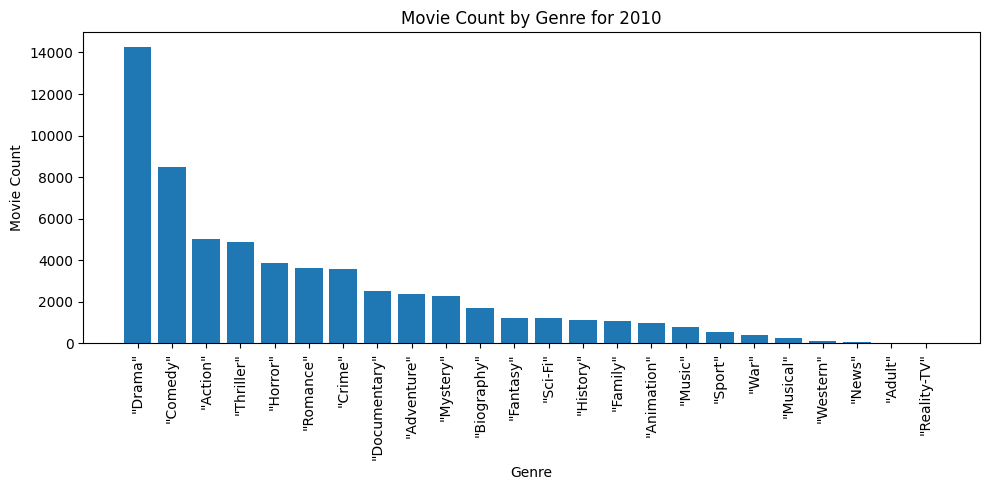

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
data_genre = pd.read_csv('genredist.csv')
data_genre

# Get unique buckets
unique_buckets = data_genre['BucketYear'].unique()

# loop over each unique bucket to plot data
for bucket in unique_buckets:
    # Filter data for the current bucket
    bucket_data = data_genre[data_genre['BucketYear'] == bucket]
    
    # Create bar plot for the current bucket
    plt.figure(figsize=(10, 5)) 
    plt.bar(bucket_data['Genre'], bucket_data['MovieCount'])
    plt.title(f"Movie Count by Genre for {bucket}")
    plt.xlabel('Genre')
    plt.ylabel('Movie Count')
    plt.xticks(rotation=90) 
    plt.tight_layout() 
    plt.show()